<h1><center>Regresion Lineal</center></h1>


<h4>Objetivo</h4>
En este notebook, se aprenderá a usar scikit-learn para implementar una regresión lineal.

<h1>Tabla de Contenido</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#SimpleLR">Regresion Lineal Simple</a></li>
        <li><a href="#MultipleRL">Regresion Lineal Multiple</a></li>
        <li><a href="#NoLinealR">Regresion No Lineal</a></li>
        <li><a href="#PolynomialR">Regresion Polinomial</a></li>
        <li><a href="#PolynomialR">Regresion Ridge</a></li>
        <li><a href="#PolynomialR">Regresion Lasso</a></li>
    </ol>
</div>
<br>
<hr>


### Importanto los paquetes necesarios

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
random_state = 42
np.random.seed(random_state)

### Descargando los datos
Para descargar los datos, se usara !wget para descargarlos de un almacenamiento en la nube, este es un conjunto de datos que IBM usa para sus entrenamientos.

In [26]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-10 15:53:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)...67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  78.8KB/s    in 0.9s    

2020-07-10 15:53:12 (78.8 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]




<h2 id="understanding_data">Entendiendo los datos</h2>

### `FuelConsumption.csv`:
El dataset con el que vamos a trabajar es de consumo de combustible, contiene clasificaciones de consumo específicas del modelo y emisiones estimadas de dióxido de carbono para nuevos vehículos ligeros para la venta minorista en Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Leyendo los datos</h2>

In [27]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Creando dataset de entrenamiento (train) y pruebas (test)

In [28]:
X, y = df['ENGINESIZE'].values.reshape(-1, 1), df['CO2EMISSIONS'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Regresion Lineal Simple
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

In [29]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


In [30]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(regr.score(X_test, y_test)))

Mean Absolute Error: 24.09725741170784
Mean Squared Error: 985.9381692274999
Root Mean Squared Error: 31.399652374309813
R-squared score (training): 0.764
R-squared score (test): 0.762



<h2 id="#MultipleRL">Regresion Lineal Multiple</h2>

En realidad, hay múltiples variables que predicen la emisión de Co2. Cuando hay más de una variable independiente presente, el proceso se llama regresión lineal múltiple. 

In [31]:
X, y = np.asanyarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]), df['CO2EMISSIONS'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [32]:
regr = LinearRegression()
regr.fit (X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[11.2094395   7.15561381  9.5208118 ]]
Intercept:  [67.34838518]


In [33]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(regr.score(X_test, y_test)))

Mean Absolute Error: 16.72159398351649
Mean Squared Error: 512.8551370148299
Root Mean Squared Error: 22.646305151499437
R-squared score (training): 0.861
R-squared score (test): 0.876



<h2 id="#NoLinealR">Regresion No Lineal</h2>

Las regresiones no lineales son una relación entre las variables independientes $x$ y una variable dependiente $y$ que resultan en datos modelados de función no lineal. Esencialmente, cualquier relación que no sea lineal puede denominarse no lineal, y generalmente está representada por el polinomio de $k$ grados (potencia máxima de $x$).

$$ \ y = ax^3 + bx^2 + cx + d \ $$

Las funciones no lineales pueden tener elementos como exponenciales, logaritmos, fracciones y otros. Por ejemplo: $$ y = \ log (x) $$
    
O incluso, más complicado como:
$$ y = \ log (a x ^ 3 + b x ^ 2 + c x + d) $$ 

In [34]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-07-10 15:53:14 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


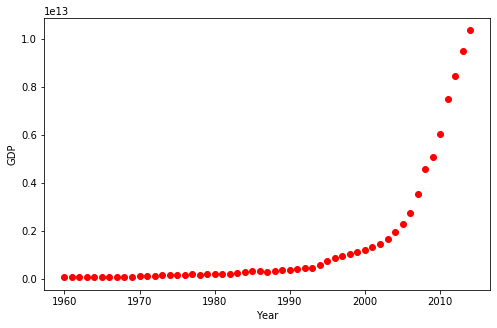

In [35]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Desde una mirada inicial a la trama, determinamos que la función logística podría ser una buena aproximación,
ya que tiene la propiedad de comenzar con un crecimiento lento, aumentar el crecimiento en el medio y luego volver a disminuir al final; como se ilustra a continuación:

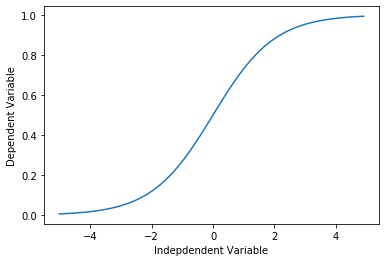

In [36]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

La fórmula para la función logística es la siguiente:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla la inclinación de la curva,

$\beta_2$: Desliza la curva en el eje x.

In [37]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

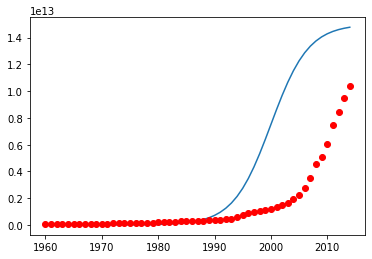

In [38]:
beta_1 = 0.30
beta_2 = 2000.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Nuestra tarea aquí es encontrar los mejores parámetros para nuestro modelo. Primero normalicemos nuestras x e y:

In [39]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### ¿Cómo encontramos los mejores parámetros para nuestra línea de ajuste?
podemos usar __curve_fit__ que usa mínimos cuadrados no lineales para ajustar nuestra función sigmoidea a los datos. Valores óptimos para los parámetros para que la suma de los residuos al cuadrado de sigmoide (xdata,*popt) - ydata se minimice.

popt son nuestros parámetros optimizados.

In [40]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.453018, beta_2 = 0.997207


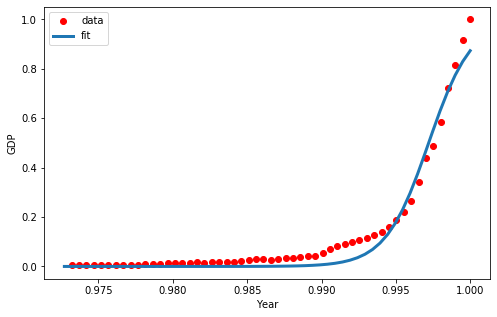

In [41]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [42]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

beta_1 = 75.574129, beta_2 = 1.507364
Mean absolute error: 0.24
Residual sum of squares (MSE): 0.17
R2-score: -3906533274018658555008216362647552.00


<h2 id="#PolynomialR">Regresion Polinomial</h2>

A veces, la tendencia de los datos no es realmente lineal y parece curvilínea. En este caso podemos usar métodos de regresión polinómica. De hecho, existen muchas regresiones diferentes que se pueden usar para ajustarse a cualquier aspecto del conjunto de datos, como cuadrático, cúbico, etc., y puede seguir y seguir hasta infinitos grados.

En esencia, podemos llamar a todos estos, regresión polinómica, donde la relación entre la variable independiente $x$ y la variable dependiente $y$ se modela como un polinomio de enésimo grado en $x$. Digamos que desea tener una regresión polinómica (hagamos un polinomio de 2 grados):

$$ y = b + \theta_1 x + \theta_2 x ^ 2 $$


Ahora, la pregunta es: ¿cómo podemos ajustar nuestros datos en esta ecuación mientras solo tenemos valores de x, como __Tamaño del motor__?
Bueno, podemos crear algunas características adicionales: 1, $ x $ y $ x ^ 2 $.


La función __PloynomialFeatures()__ en la biblioteca Scikit-learn, maneja un nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz que consta de todas las combinaciones polinómicas de las características con un grado menor o igual al grado especificado. Por ejemplo, supongamos que el conjunto de características original tiene solo una característica, _ENGINESIZE_. Ahora, si seleccionamos el grado del polinomio para que sea 2, entonces genera 3 características, grado = 0, grado = 1 y grado = 2:. 

In [43]:
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("FuelConsumption.csv")
X, y = df['ENGINESIZE'].values.reshape(-1, 1), df['CO2EMISSIONS'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [44]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]])

**fit_transform** toma nuestros valores de x y genera una lista de nuestros datos elevados de potencia de 0 a potencia de 2 (ya que establecemos el grado de nuestro polinomio en 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

La regresión polinómica es un caso especial de regresión lineal, con la idea principal de cómo seleccionar sus características. Simplemente considere reemplazar $x$ con $x_1$, $x_1^2$ con $x_2$, y así sucesivamente. Entonces la ecuación de grado 2 se convertiría en:

$$ y = b + \theta_1 x_1 + \theta_2 x_2 $$

Ahora, podemos tratarlo como un problema de `regresión lineal`. Por lo tanto, esta regresión polinómica se considera un caso especial de regresión lineal múltiple tradicional. Por lo tanto, puede usar el mismo mecanismo que la regresión lineal para resolver tales problemas.


para que podamos usar la función __LinearRegression()__ para resolverlo:

In [45]:
clf = LinearRegression().fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         47.42976379 -1.12705382]]
Intercept:  [112.92021963]


Como se mencionó anteriormente, __Coeficiente__ e __Intercepto__, son los parámetros de la línea curva ajustada.
Dado que es una regresión lineal múltiple típica, con 3 parámetros, y sabiendo que los parámetros son la intersección y los coeficientes del hiperplano, sklearn los ha estimado a partir de nuestro nuevo conjunto de conjuntos de características. Vamos a trazarlo:

Text(0, 0.5, 'Emission')

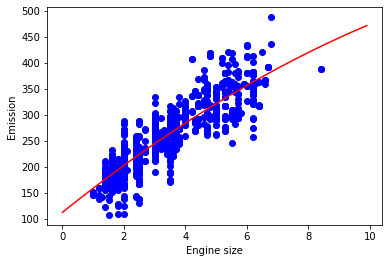

In [46]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [47]:
test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Mean absolute error: 23.92
Residual sum of squares (MSE): 960.87
R2-score: 0.69


<h2 id="#RidgeLR">Regresion Ridge</h2>

In [48]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=20.0).fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.54093533]]
Intercept:  [127.80799562]


In [51]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(regr.score(X_test, y_test)))

Mean Absolute Error: 29.619056533698135
Mean Squared Error: 1496.7460898091608
Root Mean Squared Error: 38.68780285579889
R-squared score (training): -80.380
R-squared score (test): -75.779



<h2 id="#RidgeLR">Regresion Ridge con Normalizacion</h2>

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regr = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[175.7001514]]
Intercept:  [201.25270039]


In [53]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(regr.score(X_test_scaled, y_test)))

Mean Absolute Error: 29.619056533698135
Mean Squared Error: 1496.7460898091608
Root Mean Squared Error: 38.68780285579889
R-squared score (training): 0.647
R-squared score (test): 0.638



In [54]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    regr = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = regr.score(X_train_scaled, y_train)
    r2_test = regr.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(regr.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.76, r-squared test: 0.76

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.76, r-squared test: 0.76

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.72, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.65, r-squared test: 0.64

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.47, r-squared test: 0.46

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.32, r-squared test: 0.31

Alpha = 1000.00
num abs(coeff) > 1.0: 1, r-squared training: 0.05, r-squared test: 0.04



<h2 id="#RidgeLR">Regresion Lasso</h2>

In [55]:
from sklearn.linear_model import Lasso
X_test_scaled = scaler.transform(X_test)
regr = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [233.76194796]
Intercept:  [182.74562921]


In [56]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.309089939299742
Mean Squared Error: 1116.6499591585787
Root Mean Squared Error: 33.416312770241106


In [57]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(regr.score(X_test_scaled, y_test)))

R-squared score (training): 0.737
R-squared score (test): 0.730

